# Chapter 12 - Implementing a Multi-layer Artificial Neural Network from Scratch


<center><img src="./images/irobot.jpg" alt="iRobot" style="width: 840px;"/></center>

### Overview

- [Modeling complex functions with artificial neural networks](#Modeling-complex-functions-with-artificial-neural-networks)
  - [Single-layer neural network recap](#Single-layer-neural-network-recap)
  - [Introducing the multi-layer neural network architecture](#Introducing-the-multi-layer-neural-network-architecture)
  - [Activating a neural network via forward propagation](#Activating-a-neural-network-via-forward-propagation)
- [Training an artificial neural network](#Training-an-artificial-neural-network)
  - [Computing the logistic cost function](#Computing-the-logistic-cost-function)
  - [Developing your intuition for backpropagation](#Developing-your-intuition-for-backpropagation)
  - [Training neural networks via backpropagation](#Training-neural-networks-via-backpropagation)
- [Convergence in neural networks](#Convergence-in-neural-networks)
- [Summary](#Summary)

In [2]:
from IPython.display import Image
%matplotlib inline

# Modeling complex functions with artificial neural networks

<table><tr><td><img src="./images/brain.jpg" alt="Brain" style="width: 300px;"/></td><td><img src="./images/neuron.png" alt="Neuron" style="width: 300px;"/></td></tr></table>  

- Neural network history begins in the 1940s with Warren McCulloch and Walter Pitt
    - Threshold Logic Units
<img src="./images/TLU.png" alt="TLU" style="width: 600px;"/>  
- Rosenblatt's perceptron in the 1958
    - TLU with learning algorithm
    - Still in use
    - Community lost interest until ...

- D.E. Rumelhart G.E. Hinton and R.J. Williams (re)discovered and popularized backpropagation in 1986
    - Interest reduced again with lack of sufficient computing power and rise of competing methods
- After ups and downs, several important discoveries were made in the late 200Xs and a revolution from around 2012 (+/-)
    - We will come back to this in the CNN lessons

## Single-layer neural network recap
### ADAptive LInear NEuron (Adaline)
Defined for a two-class problem.

<img src="./images/12_01.png" alt="Adaline" style="width: 600px;"/>

### Net input:  
$z = \sum_j w_j x_j = \bf{w^T x}$

### Activation function
For Adaline: 
The identity activation function simplifies the learning algorithm and allows for straightforward weight updates based on the linear relationship between the inputs and the target outputs

$\phi (z) = z = a$  
  
For Logistic Regression:  
$\phi (z) = \frac{1}{1+e^{-z}} = a$

### Threshold (for Adaline):  
$
\begin{equation}
  \hat{y}=\begin{cases}
    1  \text{ if } g(z) \geq 0\\
    -1  \text{ otherwise}.
  \end{cases}
\end{equation}
$

### Weight update
Gradient descent:  
$\bf{w:=w} + \Delta \bf{w}$, where $\Delta \bf{w} = -\eta \nabla \it{J} \bf{(w)}$,  
i.e. the gradient based on the whole training set, taking a step opposite to the gradient.

- Remebmer: The gradient of a function indicates the direction in which the function's value increases the fastest

Cost function, sum of squared errors (SSE):  
$\it{J} \bf{(w)} = \frac{1}{2}\sum^n_{i=1} (y^{(i)}-\phi (z^{(i)}))^2$

Partial derivative:  
$\frac{\partial}{\partial w_j} \it{J} (\bf{w}) = -\sum_i (y^{(i)} - \phi (z^{(i)}))x^{(i)}_j$,  
where (y, x, a) are (target label, sample and activation).

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from adalineB import AdalineGD               # Adaline which stores the w-sequence (compare code to previous slide)

In [4]:
from sklearn import datasets, preprocessing
iris = datasets.load_iris()
y_all = pd.DataFrame(iris['target'])
X_all = pd.DataFrame(iris['data'])
classNames = iris['target_names']

# Subset of the Iris data
firstClass = 0; secondClass = 1
y = y_all[(y_all[0] == firstClass) | (y_all[0] == secondClass)]
X = X_all.loc[y.index, [0, 2]].values

y = y.values
y = np.where(y == 0, -1, 1) # Change from 0,1 to -1,1
# Get shape from (100,1) to (100,), needed for boundary plotting function
y = y.reshape((np.shape(y)[0],)) 

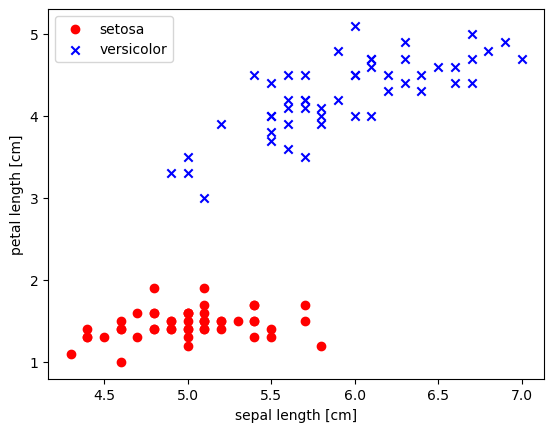

In [5]:
# Inspect raw data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label=classNames[firstClass])
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label=classNames[secondClass])

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [6]:
# Standardize input data before Adaline
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

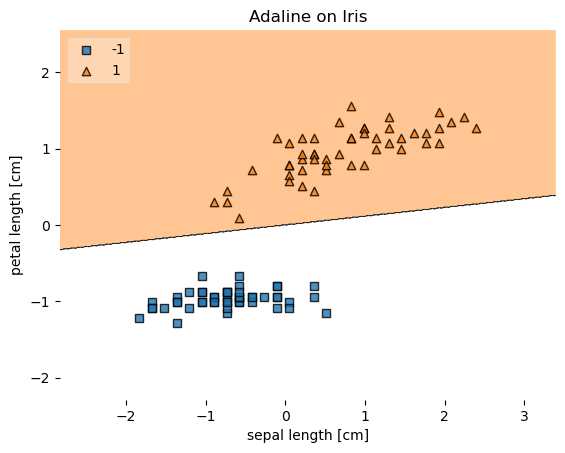

In [7]:
from mlxtend.plotting import plot_decision_regions
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, clf=ada, legend=2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Adaline on Iris')
plt.show()

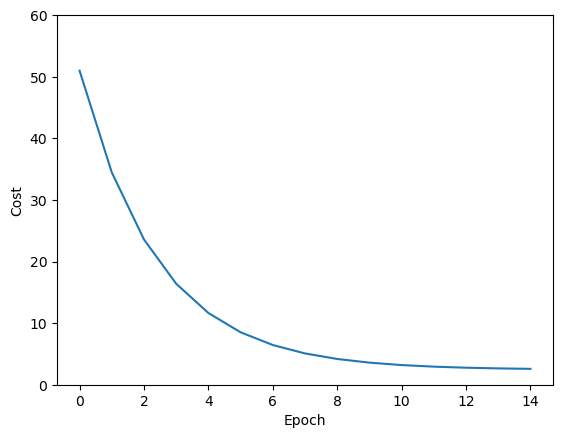

In [8]:
# Plotting the values of the cost function
fig = plt.figure()
plt.plot(ada.cost_)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.ylim([0,60])
plt.show()

In [9]:
# If you have stored the w sequence
ada.W_

[array([0.73258132, 0.97496049]),
 array([-0.06382416,  0.37479879]),
 array([0.42378193, 1.02184467]),
 array([-0.10191557,  0.62568527]),
 array([0.21994724, 1.05279234]),
 array([-0.12705925,  0.79129237]),
 array([0.08539845, 1.07322051]),
 array([-0.14365628,  0.90060759]),
 array([-0.00341556,  1.0867049 ]),
 array([-0.15461178,  0.97276523]),
 array([-0.06204059,  1.09560579]),
 array([-0.16184337,  1.0203956 ]),
 array([-0.10073826,  1.10148115]),
 array([-0.16661685,  1.05183582]),
 array([-0.12628212,  1.1053594 ])]

### Optimisation
- Gradient descent
- Stochastic gradient descent (SGD)
    - Online learning (random, single sample update)
    - Mini-batch learning (random subset update)

### SGD of $f(x) = x^2$

In [10]:
import numpy.random as npr
import numpy as np

def func(x):
    return x**2

# n_sample=50, eta=0.1 is beautiful
# n_sample=20, eta=0.01 struggles
def SGD_Sequence_1D(function=func, start=1.0, n_sample=50, eta=0.1, n_updates=20):
    sequence = np.zeros([n_updates,1])
    values   = np.zeros([n_updates,2])
    current  = start
    for i in range(n_updates):
        # New mini-batch
        x = (np.sort(npr.random(n_sample)-0.5)*2) * (abs(start)*2)
        
        # Function values of mini-batch
        y = function(x)
        
        # Add to sequence
        ind = (np.abs(x - current)).argmin()
        sequence[i] = current
        values[i,:] = [x[ind], y[ind]]

        # Find descrete derivative closest to current
        gr = np.gradient(y, x)

        # Update current
        current = current - eta*gr[ind]
    
    return(sequence, values)

In [11]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def SGD_plot(n_updates=10):
    npr.seed(1)
    seq, val = SGD_Sequence_1D(n_updates=n_updates)

    points = val.reshape(-1,1,2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    cols = np.arange(n_updates*1.0)

    fig, axs = plt.subplots()
    norm = plt.Normalize(cols.min(), cols.max())
    lc = LineCollection(segments, cmap='viridis', norm=norm)
    lc.set_array(cols)
    lc.set_linewidth(2)
    line = axs.add_collection(lc)
    fig.colorbar(line, ax=axs)
    axs.set_xlim(-1.2, 1.2)
    axs.set_ylim(0, 1.2)
    plt.show()

from ipywidgets import interact
import ipywidgets as widgets
interact(SGD_plot, n_updates=widgets.IntSlider(min=2, max=50, step=1, value=2))

interactive(children=(IntSlider(value=2, description='n_updates', max=50, min=2), Output()), _dom_classes=('wi…

<function __main__.SGD_plot(n_updates=10)>

## Introducing the multi-layer neural network architecture
First out: the Multilayer Perceptron (MLP)
- Fully connected network


<img src="./images/12_02.png" alt="Multilayer Percetron" style="width: 600px;"/>  
- $x_i^{(in)}$ = the $i$th  input feature value
- $a_i^{(in)}$ =  the $i$th  unit in the input layer. 
- $a_i^{(h)}$ =  the $i$th  unit in the hidden layer. 
- $a_i^{(out)}$ =  the $i$th  unit in the output layer. 
- $a_i^{(l)}$ = the activation unit $i$ in $l$-th layer. 
- $w_{i,j}^{(l)}$ = weight connecting unit $i$ in $l-1$-th layer with unit $j$ in $l$-th layer. These will be grouped into a matrix $W^{(l)}$ later. 
- $i=0$ are bias units (constant/intercept).  
More than one hidden layer => **deep artificial neural network**.

### First layer activation
$a^{(in)} = \begin{bmatrix}a^{(in)}_0 \\ a^{(in)}_1 \\ \vdots \\ a^{(in)}_m\end{bmatrix} = \begin{bmatrix}1 \\ x^{(in)}_1 \\ \vdots \\ x^{(in)}_m\end{bmatrix}$,  
  
i.e. the input and an intercept.  
The bias units of all layers are grouped together as a separate vector later.

### Adding layers
- More layers give higher flexibility
    - Weight matrices, $W^{(l)}$, will have dimension $m \times d$, where $m$ is the number of units in the previous layer (including the bias) and $d$ is the number of units in the $l$-th layer.
- Increases possibility of over-fitting
- Increases number of parameters to estimate (good and bad)
- Error gradients increasingly small
    - Deep learning tools/tricks to overcome this later

### Multiclass classification
- Multiple output units
- Corresponds to one-hot encoding
- Typically a soft-max function on the output:
  - Class probabilities

## Activating a neural network via forward propagation
  
Three main steps of fitting an MLP:
1. Forward propagate patterns of the training data from input to output.
2. Calculate error based on a cost function.
3. Backpropagate the error through derivatives with respect to each weight and update the model.  

Repeat for several epochs.

### 1. Forward propagation
Calculation of the first actiavation unit in the (first) hidden layer:  
  
$$z_1^{(h)} = a_0^{(in)} w_{0,1}^{(h)} + a_1^{(in)} w_{1,1}^{(h)} + \dots + a_m^{(in)} w_{m,1}^{(h)}$$  
$$a_1^{(h)} = \phi(z_1^{(h)})$$  
  
$\phi(\cdot)$ is the activation function, differentiable, often non-linear.

### Activation function examples
The basic sigmoid transforms unbounded inputs $z$ to the range $(0,1)$:
<img src="./images/12_04.png" alt="Sigmoid activation" style="width: 500px;"/>  
  
Rectified Linear Units - ReLU (and its siblings) have taken over as the default activiation function in many applications due to their simplicity and beneficial properties.

## Compact notation
For easier readability and more efficient calculations we change from sum-notation to matrix notation. Collect all activation units of layer $l-1$ and all weights for the transition to layer $l$ into matrices:  
$$\bf{Z}^\it{(l)} = \bf{A}^\it{(l-1)} \bf{W}^\it{(l)}$$
  
$$\bf{A}^\it{(l)} = \phi \left(\bf{Z}^\it{(l)} \right)$$



# Training an artificial neural network

We will go deeper into:  
- The cost function
- Backpropagation
- Convergence

## Computing the logistic cost function
The implementation used the same logistic cost functions as Chapter 3 as a basis:
$$\it{J} (w) = -\sum_{i=1}^{n} y^{[i]} log(a^{[i]}) + \left( 1-y^{[i]}\right) log(1-a^{[i]})$$
  
... where $a^{[i]}$ is output of a node for sample [i] in the output layer:
$$a^{[i]} = \phi(z^{[i]})$$

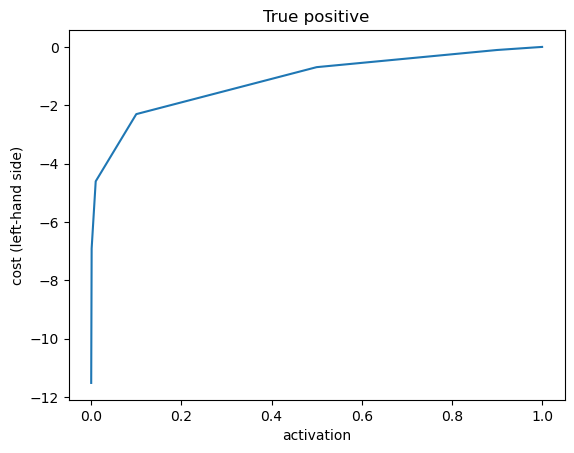

In [12]:
# Activations
a = np.array([0.00001, 0.001, 0.01, 0.1, 0.5, 0.9, 0.99, 0.999, 0.99999])
plt.plot(a, 1*np.log(a))
plt.title('True positive')
plt.xlabel('activation')
plt.ylabel('cost (left-hand side)')
plt.show()

### Proceed to explore the foundational concepts in the 'ANN_From_Scratch.pdf' document. 

### L2 penalization
$$L2 = \lambda ||w||^2_2 = \lambda \sum_{j=1}^m w^2_j,$$
  
regularizes all weights except the bias units for the node. 

Adding this to the cost results in:
  
$$\it{J} (w) = -\left[ \sum_{i=1}^{n} y^{[i]} log(a^{[i]}) + \left( 1-y^{[i]}\right) log(1-a^{[i]}) \right] + \frac{\lambda}{2} ||w||^2_2$$

### Cost function for all samples and nodes
$$\it{J} (w) = -\sum_{i=1}^{n}\sum_{j=1}^{t} y_j^{[i]} log(a_j^{[i]}) + \left( 1-y_j^{[i]}\right) log(1-a_j^{[i]})$$

Adding the L2 norm penalization finally yields:  
  
$$\it{J} (w) = -\left[ \sum_{i=1}^{n}\sum_{j=1}^{t} y_j^{[i]} log(a_j^{[i]}) + \left( 1-y_j^{[i]}\right) log(1-a_j^{[i]}) \right] + \frac{\lambda}{2} \sum_{l=1}^{L-1}\sum_{i=1}^{u_l}\sum_{j=1}^{u_{l+1}}\left(w_{j,i}^{(l)}\right)^2$$
($u_l$ is the number of units in a layer)

In [13]:
def _compute_cost(self, y_enc, output): # where y_enc = y and output = a
    L2_term = (self.l2 *
               (np.sum(self.w_h ** 2.) +
                np.sum(self.w_out ** 2.)))

    term1 = -y_enc * (np.log(output))
    term2 = (1. - y_enc) * np.log(1. - output)
    cost = np.sum(term1 - term2) + L2_term
    return cost

### One-hot encoding representation
The activation of the third layer and the target class for __a particular__ sample may look like this:
$$a^{(out)} = \begin{bmatrix}0.1 \\ 0.9 \\ \vdots \\ 0.3\end{bmatrix}, y = \begin{bmatrix}0 \\ 1 \\ \vdots \\ 0\end{bmatrix}$$

In [14]:
def predict(self, X):
    z_h, a_h, z_out, a_out = self._forward(X)
    y_pred = np.argmax(z_out, axis=1) # argmax on z_out and a_out is equivalent
    return y_pred

### Cost minimization
... will be performed using the partial derivative of the parameters of $W$ with respect to each weight for every layer:
$$\frac{\partial}{\partial w_{j,i}^{(l)}}J(W)$$

## Developing your intuition for backpropagation
- Backpropagation is still one of the most popular algorithms to train ANNs
- Challenging with high dimensions and non-convex cost function (local minima)
- Main building block: "The chain rule"
    - Derivative of a nested function
$$\frac{d}{dx}[f(g(x))] = \frac{df}{dg}\cdot\frac{dg}{dx}$$

$$F(x) = f(g(h(u(v(x)))))$$
  
$$\frac{dF}{dx} = \frac{d}{dx}F(x) = \frac{d}{dx}[f(g(h(u(v(x)))))] = \frac{df}{dg}\cdot\frac{dg}{dh}\cdot\frac{dh}{du}\cdot\frac{du}{dv}\cdot\frac{dv}{dx}$$

The derivative of the sigmoid function:  

$$\phi'(z) = \frac{\partial}{\partial z} \left( \frac{1}{1+e^{-z}} \right) = \frac{1}{1+e^{-z}} - \left( \frac{1}{1+e^{-z}} \right)^2$$  
  
$$= \phi(z) - (\phi(z))^2 = \phi(z)(1-\phi(z)) = a(1-a)$$

Proof: https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e

### Deriving everything by hand
- ... is something we can avoid
- Automatic differentiation
    - Simple function derivatives can be coded as matrices
    - Starting from the left would yields a number of matrix products times a vector (forward mode)
    - Starting from the right all products are of the form matrix times vector (reverse mode)
        - Dimension collapse => high speed

### Proceed to explore Computational Graph concept 'Computational_Graph.pdf' document. 

## Training neural networks via backpropagation
Let's assume that the loss is the Mean Squared Error, which involves averaging the activation units within our network, in addition to averaging over the n training examples
$$\it{L} (w,b) = \frac{1}{n}\sum_{i=1}^{n}\frac{1}{t}\sum_{j=1}^{t} (y_j^{[i]} - a_j^{(out)[i]})^{2}$$

## Training neural networks via backpropagation
Forward-propagation of input features through:   
<img src="./images/BB1.png" alt="Feed forward" style="width: 800px;"/>  

## Training neural networks via backpropagation
### The derivative of the loss $L$ w.r.t. $w_{1,1}^{(out)}$
<img src="./images/BB3__.png" alt="Feed forward" style="width: 800px;"/> 

## Training neural networks via backpropagation
### The derivative of the first term
<img src="./images/BB3___.png" alt="Feed forward" style="width: 800px;"/> 

## Training neural networks via backpropagation
### The derivative of the second term
<img src="./images/BB4_.png" alt="Feed forward" style="width: 800px;"/> 

## Training neural networks via backpropagation
### The derivative of the third term
<img src="./images/BB5_.png" alt="Feed forward" style="width: 800px;"/> 

## Training neural networks via backpropagation
### Putting all together
<img src="./images/BB6_.png" alt="Feed forward" style="width: 800px;"/> 

## Training neural networks via backpropagation
### The derivative of the loss $L$ w.r.t. $w_{1,1}^{(h)}$
<img src="./images/BB7.png" alt="Feed forward" style="width: 800px;"/> 

## Training neural networks via backpropagation
- Gradients represent how much a small change in a parameter (such as a weight) affects the output of a function (such as the loss function). how much a small change in a parameter (such as a weight) 
- When you calculate the gradient during backpropagation, it involves multiplying the error (a measure of how far the network's prediction is from the actual target) by the weights. This multiplication represents how much the weights contributed to the error in the output.

### Weight update
$$W^{(l)}:=W^{(l)} - \eta \Delta^{(l)}$$  
  
A small step in the opposite direction of the gradient (for each layer in the network).

# Convergence in neural networks
- Gradient descent with mini-batch instead of stochastic gradient descent (Ch. 2, p.47)
    - Efficient vectorized code
    - Like a "meningsmåling ved valg" / election poll
    - Still stochastic, hopefully jumping out of local minima
- Learning rate: fixed rate $\eta$
    - Deep Learning brings adaptive learning rate, learning rate with decay, learning rate with restarts, ...

<img src="./images/12_13.png" alt="Convergence" style="width: 500px;"/>  

# Summary
- Visit: https://playground.tensorflow.org/
- Expanded perceptron to multilayer perceptron
    - Varying numbers of units (input, hidden, hidden, ..., output)
    - SGD -> mini-batch
    - Forward propagation of features
    - Backpropagation of errors (chain rule)
    - Developed the gradient of the cost function for all weights in the network
- Non-exhaustive list of activation functions on page 469.